In [1]:
import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 设置绘图风格
plt.style.use('ggplot')
# # 设置中文编码和负号的正常显示
# plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
# plt.rcParams['axes.unicode_minus'] = False
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

# 一、读数据

In [3]:
with open('微博api数据/微博数据统计表-EWS_STAT_WEIBO_BLOGINFO.csv', encoding='gb18030') as f:
    df = pd.read_csv(f)
df.head()

,ID,STATID,STATDATE,CREATETIME,UPDATETIME,user,FOCUS,BLOG
0,437,1,2017-10-08,2017/10/8 5:00:00,2017/10/8 23:00:00,1117846,285,32521
1,438,5,2017-10-08,2017/10/8 5:00:00,2017/10/8 23:00:03,164482,0,0
2,439,1,2017-10-09,2017/10/9 5:00:00,2017/10/9 23:00:00,1118831,285,32540
3,440,5,2017-10-09,2017/10/9 5:00:02,2017/10/9 23:00:00,164550,0,0
4,441,1,2017-10-10,2017/10/10 5:00:00,2017/10/10 23:00:00,1119818,285,32553


In [4]:
df.describe()

,ID,STATID,user,FOCUS,BLOG
count,655.000000,655.000000,6.550000e+02,655.000000,655.000000
mean,480.000000,3.035115,6.406209e+05,143.254962,15990.280916
std,189.226496,1.998544,4.912008e+05,146.340197,16408.361382
min,153.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,316.500000,1.000000,1.677470e+05,0.000000,0.000000
50%,480.000000,5.000000,1.807750e+05,0.000000,0.000000
75%,643.500000,5.000000,1.130004e+06,288.000000,32772.000000
max,807.000000,5.000000,1.295136e+06,312.000000,37329.000000


In [5]:
# df.info()
df.dtypes

ID             int64
STATID         int64
STATDATE      object
CREATETIME    object
UPDATETIME    object
user           int64
FOCUS          int64
BLOG           int64
dtype: object

In [6]:
df.drop_duplicates('STATID')

,ID,STATID,STATDATE,CREATETIME,UPDATETIME,user,FOCUS,BLOG
0,437,1,2017-10-08,2017/10/8 5:00:00,2017/10/8 23:00:00,1117846,285,32521
1,438,5,2017-10-08,2017/10/8 5:00:00,2017/10/8 23:00:03,164482,0,0
371,153,3,2017-04-26,2017/4/26 16:13:01,2017/4/26 18:14:49,0,0,0
372,154,4,2017-04-26,2017/4/26 16:17:47,2017/4/26 18:06:02,439,15,2210


In [7]:
df.STATID.value_counts()

5    332
1    321
4      1
3      1
Name: STATID, dtype: int64

In [8]:
df.shape

(655, 8)

# 二、研究df1

## 2.1 描述df1

In [9]:
df1 = df.loc[df.STATID == 1, :]
df1.head()

,ID,STATID,STATDATE,CREATETIME,UPDATETIME,user,FOCUS,BLOG
0,437,1,2017-10-08,2017/10/8 5:00:00,2017/10/8 23:00:00,1117846,285,32521
2,439,1,2017-10-09,2017/10/9 5:00:00,2017/10/9 23:00:00,1118831,285,32540
4,441,1,2017-10-10,2017/10/10 5:00:00,2017/10/10 23:00:00,1119818,285,32553
6,443,1,2017-10-11,2017/10/11 5:00:00,2017/10/11 23:00:00,1120877,285,32567
8,445,1,2017-10-12,2017/10/12 5:00:00,2017/10/12 23:00:00,1122032,285,32581


In [10]:
df1.shape

(321, 8)

In [11]:
df1.index

Int64Index([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,
            ...
            635, 637, 639, 641, 643, 645, 647, 649, 651, 653],
           dtype='int64', length=321)

## 2.2 将object转换为datetime

In [12]:
df1['STATDATE'] = pd.to_datetime(df1.STATDATE)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
df1.dtypes

ID                     int64
STATID                 int64
STATDATE      datetime64[ns]
CREATETIME            object
UPDATETIME            object
user                   int64
FOCUS                  int64
BLOG                   int64
dtype: object

In [14]:
df1.set_index('STATDATE', inplace=True)

In [15]:
df1.head()

,ID,STATID,CREATETIME,UPDATETIME,user,FOCUS,BLOG
STATDATE,,,,,,,
2017-10-08,437,1,2017/10/8 5:00:00,2017/10/8 23:00:00,1117846,285,32521
2017-10-09,439,1,2017/10/9 5:00:00,2017/10/9 23:00:00,1118831,285,32540
2017-10-10,441,1,2017/10/10 5:00:00,2017/10/10 23:00:00,1119818,285,32553
2017-10-11,443,1,2017/10/11 5:00:00,2017/10/11 23:00:00,1120877,285,32567
2017-10-12,445,1,2017/10/12 5:00:00,2017/10/12 23:00:00,1122032,285,32581


In [16]:
df1.index.name = 'STATDATE'
df1.reset_index(inplace=True)
df1

,STATDATE,ID,STATID,CREATETIME,UPDATETIME,user,FOCUS,BLOG
0,2017-10-08,437,1,2017/10/8 5:00:00,2017/10/8 23:00:00,1117846,285,32521
1,2017-10-09,439,1,2017/10/9 5:00:00,2017/10/9 23:00:00,1118831,285,32540
2,2017-10-10,441,1,2017/10/10 5:00:00,2017/10/10 23:00:00,1119818,285,32553
3,2017-10-11,443,1,2017/10/11 5:00:00,2017/10/11 23:00:00,1120877,285,32567
4,2017-10-12,445,1,2017/10/12 5:00:00,2017/10/12 23:00:00,1122032,285,32581
5,2017-10-13,447,1,2017/10/13 5:00:00,2017/10/13 23:00:00,1123294,285,32597
6,2017-10-14,449,1,2017/10/14 5:00:00,2017/10/14 23:00:00,1124451,285,32630
7,2017-10-15,451,1,2017/10/15 5:00:00,2017/10/15 23:00:00,1126161,285,32666
8,2017-10-16,453,1,2017/10/16 5:00:00,2017/10/16 23:00:00,1127381,285,32698
9,2017-10-17,455,1,2017/10/17 5:00:00,2017/10/17 23:00:00,1128173,285,32717


In [17]:
df1.to_csv('df1.csv')

In [18]:
df1.index

RangeIndex(start=0, stop=321, step=1)

In [19]:
df1.sort_values(by='STATDATE', inplace=True)
df1

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,STATDATE,ID,STATID,CREATETIME,UPDATETIME,user,FOCUS,BLOG
182,2017-04-29,162,1,2017/4/28 20:00:15,2017/5/5 19:00:00,983521,278,27885
181,2017-04-30,161,1,2017/4/28 20:00:15,2017/5/5 17:00:01,983571,278,27898
180,2017-05-01,160,1,2017/4/28 20:00:15,2017/5/5 17:00:01,983621,278,27917
179,2017-05-02,159,1,2017/4/28 20:00:15,2017/5/5 17:00:01,983671,278,27930
178,2017-05-03,158,1,2017/4/28 20:00:15,2017/5/5 17:00:01,983721,278,27952
177,2017-05-04,157,1,2017/4/28 20:00:15,2017/5/5 17:00:01,983771,278,28004
176,2017-05-05,155,1,2017/4/26 18:14:01,2017/5/5 18:00:00,983853,278,28017
183,2017-05-07,164,1,2017/5/7 13:00:09,2017/5/7 23:00:00,985930,278,28095
184,2017-05-08,165,1,2017/5/8 5:00:05,2017/5/8 23:00:00,986970,278,28148
185,2017-05-09,167,1,2017/5/9 5:00:00,2017/5/9 23:00:00,987570,278,28165


In [20]:
df1.index

Int64Index([182, 181, 180, 179, 178, 177, 176, 183, 184, 185,
            ...
            166, 167, 168, 169, 170, 171, 172, 173, 174, 175],
           dtype='int64', length=321)

In [21]:
df1.STATDATE.min()

Timestamp('2017-04-29 00:00:00')

In [22]:
df1.STATDATE.max()

Timestamp('2018-04-28 00:00:00')

In [23]:
df1.STATDATE.max() - df1.STATDATE.min()

Timedelta('364 days 00:00:00')

Text(0.5,1,'粉丝增长曲线')

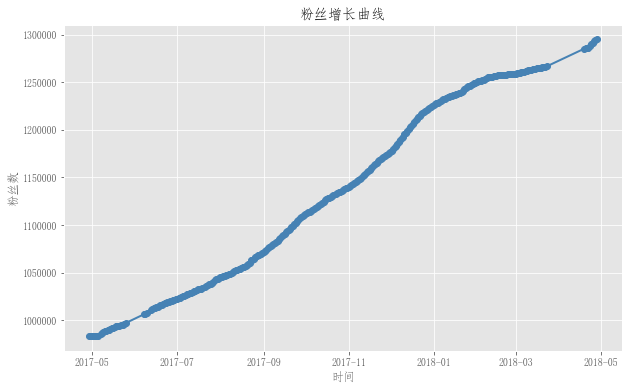

In [24]:
# 设置图框的大小
fig = plt.figure(figsize=(10,6))
# 绘图
plt.plot(df1.STATDATE, # x轴数据
         df1.user, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'steelblue', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
#          markerfacecolor='brown'
        ) # 点的填充色
plt.ylabel('粉丝数')
plt.xlabel('时间')
plt.title('粉丝增长曲线')

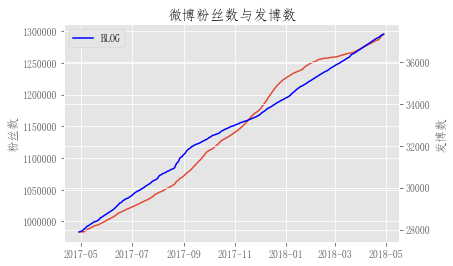

In [79]:
import matplotlib.pyplot as plt
import numpy as np

x = df1.STATDATE
y1 = df1.user
y2 = df1.BLOG

fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.plot(x, y1)
ax1.set_ylabel('粉丝数')
ax1.set_title("微博粉丝数与发博数")

ax2 = ax1.twinx()  # this is the important function
ax2.plot(x, y2, 'b')
# ax2.set_xlim([0, np.e])
ax2.set_ylabel('发博数')
# ax2.set_xlabel('Same X for both exp(-x) and ln(x)')

# label = ['粉丝数', '发博数']
plt.legend(loc=0)
# plt.legend(bbox_to_anchor=(0.5, 0.5), loc=1, borderaxespad=0.)


plt.show()

In [39]:
corr = df1.user.corr(df1.BLOG) #计算相关系数
print(corr)

0.9864104183357062


## 2.3 对年份进行研究

In [298]:
df1['year'] = df1.STATDATE.dt.year
df1.year.head()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


182    2017
181    2017
180    2017
179    2017
178    2017
Name: year, dtype: int64

## 2.4 对月份进行研究

In [299]:
df1['month'] = df1.STATDATE.dt.month
df1.month

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


182    4
181    4
180    5
179    5
178    5
177    5
176    5
183    5
184    5
185    5
186    5
187    5
188    5
189    5
190    5
191    5
192    5
193    5
194    5
195    5
196    5
197    5
198    5
199    5
200    5
201    6
202    6
203    6
204    6
205    6
      ..
146    3
147    3
148    3
149    3
150    3
151    3
152    3
153    3
154    3
155    3
156    3
157    3
158    3
159    3
160    3
161    3
162    3
163    3
164    3
165    3
166    4
167    4
168    4
169    4
170    4
171    4
172    4
173    4
174    4
175    4
Name: month, Length: 321, dtype: int64

In [300]:
df1.year + df1.month

182    2021
181    2021
180    2022
179    2022
178    2022
177    2022
176    2022
183    2022
184    2022
185    2022
186    2022
187    2022
188    2022
189    2022
190    2022
191    2022
192    2022
193    2022
194    2022
195    2022
196    2022
197    2022
198    2022
199    2022
200    2022
201    2023
202    2023
203    2023
204    2023
205    2023
       ... 
146    2021
147    2021
148    2021
149    2021
150    2021
151    2021
152    2021
153    2021
154    2021
155    2021
156    2021
157    2021
158    2021
159    2021
160    2021
161    2021
162    2021
163    2021
164    2021
165    2021
166    2022
167    2022
168    2022
169    2022
170    2022
171    2022
172    2022
173    2022
174    2022
175    2022
Length: 321, dtype: int64

In [301]:
df1.month.dtype

dtype('int64')

In [302]:
df1.month.value_counts()

12    31
8     31
1     31
11    30
10    30
9     30
7     30
2     28
5     23
3     23
6     22
4     12
Name: month, dtype: int64

## 2.4 对一周进行研究

In [303]:
df1.STATDATE.dt.weekday_name.head()

182     Saturday
181       Sunday
180       Monday
179      Tuesday
178    Wednesday
Name: STATDATE, dtype: object

In [304]:
df1['year'] = df1.year.astype(object)
df1.dtypes

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


STATDATE      datetime64[ns]
ID                     int64
STATID                 int64
CREATETIME            object
UPDATETIME            object
user                   int64
FOCUS                  int64
BLOG                   int64
year                  object
month                  int64
dtype: object

In [305]:
df1['month'] = df1.month.astype(object)
df1.dtypes

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


STATDATE      datetime64[ns]
ID                     int64
STATID                 int64
CREATETIME            object
UPDATETIME            object
user                   int64
FOCUS                  int64
BLOG                   int64
year                  object
month                 object
dtype: object

In [271]:
df1.year + df1.month

182    2021
181    2021
180    2022
179    2022
178    2022
177    2022
176    2022
183    2022
184    2022
185    2022
186    2022
187    2022
188    2022
189    2022
190    2022
191    2022
192    2022
193    2022
194    2022
195    2022
196    2022
197    2022
198    2022
199    2022
200    2022
201    2023
202    2023
203    2023
204    2023
205    2023
       ... 
146    2021
147    2021
148    2021
149    2021
150    2021
151    2021
152    2021
153    2021
154    2021
155    2021
156    2021
157    2021
158    2021
159    2021
160    2021
161    2021
162    2021
163    2021
164    2021
165    2021
166    2022
167    2022
168    2022
169    2022
170    2022
171    2022
172    2022
173    2022
174    2022
175    2022
Length: 321, dtype: object

# 三、研究df5

## 3.1 描述df5

In [45]:
df5 = df.loc[df.STATID == 5, :]
df5.head()

,ID,STATID,STATDATE,CREATETIME,UPDATETIME,user,FOCUS,BLOG
1,438,5,2017-10-08,2017/10/8 5:00:00,2017/10/8 23:00:03,164482,0,0
3,440,5,2017-10-09,2017/10/9 5:00:02,2017/10/9 23:00:00,164550,0,0
5,442,5,2017-10-10,2017/10/10 5:00:00,2017/10/10 23:00:00,164721,0,0
7,444,5,2017-10-11,2017/10/11 5:00:02,2017/10/11 23:00:02,164910,0,0
9,446,5,2017-10-12,2017/10/12 5:00:01,2017/10/12 23:00:03,165172,0,0


In [46]:
df5.shape

(332, 8)

In [62]:
df5.index

Int64Index([195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
            ...
            185, 186, 187, 188, 189, 190, 191, 192, 193, 194],
           dtype='int64', length=332)

## 3.2 将object转换为datetime

In [48]:
df5['STATDATE'] = pd.to_datetime(df5.STATDATE)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
df5.dtypes

ID                     int64
STATID                 int64
STATDATE      datetime64[ns]
CREATETIME            object
UPDATETIME            object
user                   int64
FOCUS                  int64
BLOG                   int64
dtype: object

In [50]:
df5.set_index('STATDATE', inplace=True)

In [51]:
df5.head()

,ID,STATID,CREATETIME,UPDATETIME,user,FOCUS,BLOG
STATDATE,,,,,,,
2017-10-08,438,5,2017/10/8 5:00:00,2017/10/8 23:00:03,164482,0,0
2017-10-09,440,5,2017/10/9 5:00:02,2017/10/9 23:00:00,164550,0,0
2017-10-10,442,5,2017/10/10 5:00:00,2017/10/10 23:00:00,164721,0,0
2017-10-11,444,5,2017/10/11 5:00:02,2017/10/11 23:00:02,164910,0,0
2017-10-12,446,5,2017/10/12 5:00:01,2017/10/12 23:00:03,165172,0,0


In [52]:
df5.index.name = 'STATDATE'
df5.reset_index(inplace=True)
df5

,STATDATE,ID,STATID,CREATETIME,UPDATETIME,user,FOCUS,BLOG
0,2017-10-08,438,5,2017/10/8 5:00:00,2017/10/8 23:00:03,164482,0,0
1,2017-10-09,440,5,2017/10/9 5:00:02,2017/10/9 23:00:00,164550,0,0
2,2017-10-10,442,5,2017/10/10 5:00:00,2017/10/10 23:00:00,164721,0,0
3,2017-10-11,444,5,2017/10/11 5:00:02,2017/10/11 23:00:02,164910,0,0
4,2017-10-12,446,5,2017/10/12 5:00:01,2017/10/12 23:00:03,165172,0,0
5,2017-10-13,448,5,2017/10/13 5:00:02,2017/10/13 23:00:03,165394,0,0
6,2017-10-14,450,5,2017/10/14 5:00:00,2017/10/14 23:00:00,165653,0,0
7,2017-10-15,452,5,2017/10/15 5:00:02,2017/10/15 23:00:00,166581,0,0
8,2017-10-16,454,5,2017/10/16 5:00:01,2017/10/16 23:00:03,166956,0,0
9,2017-10-17,456,5,2017/10/17 5:00:01,2017/10/17 23:00:00,167082,0,0


In [53]:
df5.to_csv('df5.csv')

In [54]:
df5.index

RangeIndex(start=0, stop=332, step=1)

In [55]:
df5.sort_values(by='STATDATE', inplace=True)
df5

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,STATDATE,ID,STATID,CREATETIME,UPDATETIME,user,FOCUS,BLOG
195,2017-05-05,156,5,2017/4/28 20:00:15,2017/5/5 19:00:01,137543,0,0
196,2017-05-07,163,5,2017/5/7 13:00:04,2017/5/7 23:00:03,138175,0,0
197,2017-05-08,166,5,2017/5/8 5:00:06,2017/5/8 23:00:03,138578,0,0
198,2017-05-09,168,5,2017/5/9 5:00:00,2017/5/9 23:00:01,138738,0,0
199,2017-05-10,170,5,2017/5/10 5:00:00,2017/5/10 23:00:01,138816,0,0
200,2017-05-11,172,5,2017/5/11 5:00:01,2017/5/11 23:00:02,138970,0,0
201,2017-05-12,174,5,2017/5/12 5:00:00,2017/5/12 23:00:02,139238,0,0
202,2017-05-13,176,5,2017/5/13 5:00:01,2017/5/13 23:00:02,139366,0,0
203,2017-05-14,177,5,2017/5/14 5:00:01,2017/5/14 23:00:03,139466,0,0
204,2017-05-15,180,5,2017/5/15 5:00:01,2017/5/15 23:00:03,139753,0,0


In [56]:
df5.index

Int64Index([195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
            ...
            185, 186, 187, 188, 189, 190, 191, 192, 193, 194],
           dtype='int64', length=332)

In [57]:
df5.STATDATE.min()

Timestamp('2017-05-05 00:00:00')

In [58]:
df5.STATDATE.max()

Timestamp('2018-04-26 00:00:00')

In [59]:
df5.STATDATE.max() - df5.STATDATE.min()

Timedelta('356 days 00:00:00')

Text(0.5,1,'粉丝增长曲线')

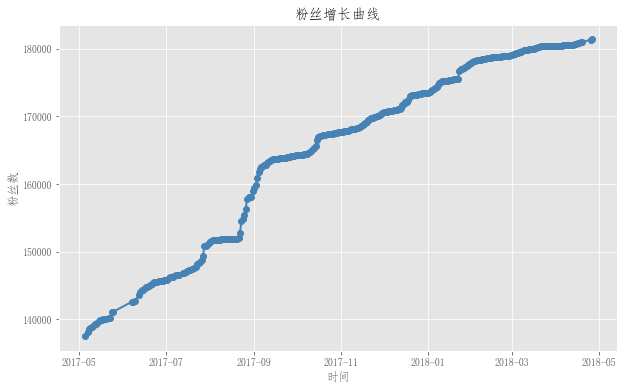

In [60]:
# 设置图框的大小
fig = plt.figure(figsize=(10,6))
# 绘图
plt.plot(df5.STATDATE, # x轴数据
         df5.user, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'steelblue', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
#          markerfacecolor='brown'
        ) # 点的填充色
plt.ylabel('粉丝数')
plt.xlabel('时间')
plt.title('粉丝增长曲线')

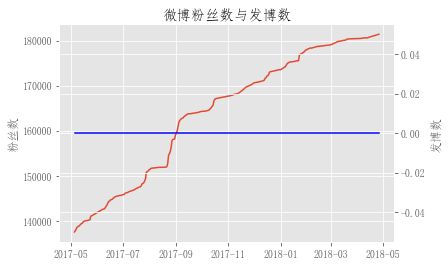

In [63]:
import matplotlib.pyplot as plt
import numpy as np

x = df5.STATDATE
y1 = df5.user
y2 = df5.BLOG

fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.plot(x, y1)
ax1.set_ylabel('粉丝数')
ax1.set_title("微博粉丝数与发博数")

ax2 = ax1.twinx()  # this is the important function
ax2.plot(x, y2, 'b')
# ax2.set_xlim([0, np.e])
ax2.set_ylabel('发博数')
# ax2.set_xlabel('Same X for both exp(-x) and ln(x)')

plt.show()

In [64]:
corr = df5.user.corr(df5.BLOG) #计算相关系数
print(corr)

nan
